<font size=10>Laboratory Assignment 3.1</font>

# Introduction
In this laboratory, we will cover the basic element of programming using a map-reduce methodology. For that purpose, we will be using Apache Spark as a reference, but bear in mind that similar frameworks exists and principles can be extrapolated.

## Some concepts and facts

- Spark is a distributed computing platform that operates on a cluster. Like MPI, we expect that nodes does NOT share a memory space but they are connected in high-speed dedicated network. Distributed filesystems that work over the network are extremely useful.

- It is considered the next generation of previous map-reduce standard Apache Hadoop. Main difference is thought to be the use of the memory instead of disk for intermediate operations, but there are many more improvements.

- It is built on Java. Despite this, it can be programmed using Java, Scala, Python or R. The complete API can only be found in JVM-based languages but the most frequent one is PySpark, since people is reluctant to use JVM-based languages in data science. Indeed, since Hadoop was only available for Java, it is likely that some Java codes of Spark are adaptations of previous Hadoop codes.

- Resilient Distributed Dataset (RDD): the basic unit that is processed in Spark. Equivalent to a numpy array but distributed.

- RDD API usually exposes the low-level operations of Apache Spark, useful for preprocessing data but useless for data analytics

- For data analysis, Dataframe and Spark SQL is used. It relies on a pandas-alike API that even accepts SQL code (which may sound crazy and useless for developers, but many *old* data scientists and statisticians are really proficient in SQL but not in Python).

## How to install Spark in colab.

In [2]:
spark_version = "3.5.0"
hadoop_version = "3"

!apt-get update
!apt-get install openjdk-8-jdk-headless -qq # Install JVM v8
!wget -O spark-{spark_version}-bin-hadoop{hadoop_version}.tgz -q https://downloads.apache.org/spark/spark-{spark_version}/spark-{spark_version}-bin-hadoop{hadoop_version}.tgz # Download latest release. Update if necessary
!tar xf spark-{spark_version}-bin-hadoop{hadoop_version}.tgz # Unzip
!pip install pyspark # Well, the library itself
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/spark-{spark_version}-bin-hadoop{hadoop_version}"

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.0 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,278 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/mu

## How to initialize Spark

In [3]:
from pyspark.sql import SparkSession

APP_NAME = "CAP-lab3"
SPARK_URL = "local[*]"
spark = SparkSession.builder.appName(APP_NAME).master(SPARK_URL).getOrCreate()
sc = spark.sparkContext

# First Part: RDDs

## Basic operations

### Parallelize & collect

It creates a RDD out of a list or array. Second argument indicates the number of pieces of the RDD

In [4]:
array = sc.parallelize([1,2,3,4,5,6,7,8,9,10], 2)
array

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:289

In [5]:
import numpy as np
randomSamples = sc.parallelize(np.random.randn(100))
randomSamples

ParallelCollectionRDD[1] at readRDDFromFile at PythonRDD.scala:289

Cool, RDDs can not be printed...

Of course, RDDs can not be printed unless they are reduced

In [6]:
print(array.collect())
print(randomSamples.collect())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[2.0095827346650865, 0.5280512556951231, 0.018622308184655448, -1.0367695755158028, 0.22421941859055075, 0.25463585450681786, -0.22054237520299408, -1.5651116193893482, 0.590112208968984, -1.1367036737984226, -0.23935055487183196, 0.8581667901888268, -0.7303163259172486, 0.15957520278891132, 0.2721732084963134, 1.1751900872410852, -0.09899432006241485, -0.44739682141813214, -2.3736620030025404, 0.2964467904904344, 0.10241150547125077, 0.9565624968385239, 0.5174480930682193, -1.625335334207974, -0.8071451187203587, -0.4918920056068108, -0.26752485042255275, -0.7712596461205544, -1.655792065572748, 1.140130557822574, -0.12304045838975201, -0.426713346515616, -0.4932692839418887, 1.6414615193600997, 0.17282991222690108, 0.7844913524390533, 0.5585159760654692, 0.7430045695632036, 0.012478774547308502, -0.25516364513806933, 0.6237294960294001, 0.04274761192521376, -0.62218106044104, 1.2537478193314238, 0.9814225546896911, -2.7131700238161076, 0.28734295003902

Spark uses lazy operations for everything, this means that nothing is evaluated until an action, a reduce operation normally, is performed. The basic reduce operation is collect, which returns the whole RDD (i.e. no reduction is performed).

### Other ways of loading data

In [7]:
import requests

request = requests.get("https://gist.githubusercontent.com/jsdario/6d6c69398cb0c73111e49f1218960f79/raw/8d4fc4548d437e2a7203a5aeeace5477f598827d/el_quijote.txt")
with open("elquijote.txt", "wb") as f:
  f.write(request.content)

In [8]:
quijote = sc.textFile("elquijote.txt")
quijote.take(10)

['DON QUIJOTE DE LA MANCHA',
 'Miguel de Cervantes Saavedra',
 '',
 'PRIMERA PARTE',
 'CAPÍTULO 1: Que trata de la condición y ejercicio del famoso hidalgo D. Quijote de la Mancha',
 'En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que vivía un hidalgo de los de lanza en astillero, adarga antigua, rocín flaco y galgo corredor. Una olla de algo más vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lentejas los viernes, algún palomino de añadidura los domingos, consumían las tres partes de su hacienda. El resto della concluían sayo de velarte, calzas de velludo para las fiestas con sus pantuflos de lo mismo, los días de entre semana se honraba con su vellori de lo más fino. Tenía en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la podadera. Frisaba la edad de nuestro hidalgo con los cincuenta años, era de 

Here, you can see both a method to load a text file line per line and a another reduction operation.

In [9]:
quijote.take

<bound method RDD.take of elquijote.txt MapPartitionsRDD[3] at textFile at NativeMethodAccessorImpl.java:0>

### Transformations

Let's review all the transformation that can be performed to data.

In [10]:
from numpy.random.mtrand import sample
charsPerLine = quijote.map(lambda s: len(s))
allWords = quijote.flatMap(lambda s: s.split())
allWordsNoArticles = allWords.filter(lambda a: a.lower() not in ["el", "la"])
allWordsUnique = allWords.map(lambda s: s.lower()).distinct()
sampleWords = allWords.sample(withReplacement=True, fraction=0.2, seed=666)
sampleUnique = allWordsUnique.sample(withReplacement=True, fraction=0.2, seed=666)
weirdSampling = sampleWords.union(sampleUnique)

In [11]:
# Map devuelve el mismo número de elementos que la entrada (K = N)
print(f"Quijote_count: {quijote.count()}\nChars_per_line: {charsPerLine.count()}")

Quijote_count: 2186
Chars_per_line: 2186


In [12]:
# Flatmap aumenta resultado por cada elemento de entrada (K >= N)
print(f"Quijote_count: {quijote.count()}\nAll_words: {allWords.count()}")

Quijote_count: 2186
All_words: 187018


In [13]:
# Filter filtra elementos por los que normalmente (K <= N, pero puede ser K = N o K = 0 si todos pasan o ninguno pasa)
print(f"All_words: {allWords.count()}\nAll_words_no_articles: {allWordsNoArticles.count()}")

All_words: 187018
All_words_no_articles: 178167


In [14]:
# Distinct borra elementos repetidos (K <= N o K = N si no hay)
print(f"All_words: {allWords.count()}\nAll_words_unique: {allWordsUnique.count()}")

All_words: 187018
All_words_unique: 22211


In [15]:
# Sample selecciona una muestra aleatoria (K <= N)
print(f"All_words: {allWords.count()}\nSample_words: {sampleWords.count()}")

All_words: 187018
Sample_words: 37251


In [16]:
# Union une dos RDDs (K = N1 + N2)
print(f"Sample_unique: {sampleUnique.count()}\nSample_words: {sampleWords.count()}\nWeirdSampling: {weirdSampling.count()}")

Sample_unique: 4430
Sample_words: 37251
WeirdSampling: 41681


In [17]:
allWordsUnique.take(10)

['don',
 'mancha',
 'saavedra',
 'primera',
 'parte',
 '1:',
 'que',
 'condición',
 'y',
 'del']

In [18]:
charsPerLine.take(10)

[24, 28, 0, 13, 94, 3080, 526, 595, 33, 918]

In [19]:
allWords.take(10)

['DON',
 'QUIJOTE',
 'DE',
 'LA',
 'MANCHA',
 'Miguel',
 'de',
 'Cervantes',
 'Saavedra',
 'PRIMERA']

In [20]:
allWordsNoArticles.take(10)

['DON',
 'QUIJOTE',
 'DE',
 'MANCHA',
 'Miguel',
 'de',
 'Cervantes',
 'Saavedra',
 'PRIMERA',
 'PARTE']

In [21]:
allWordsUnique.take(10)

['don',
 'mancha',
 'saavedra',
 'primera',
 'parte',
 '1:',
 'que',
 'condición',
 'y',
 'del']

In [22]:
sampleWords.take(10)

['DON', 'Que', 'ejercicio', 'del', 'D.', 'la', 'no', 'ha', 'hidalgo', 'de']

In [23]:
weirdSampling.take(10)

['DON', 'Que', 'ejercicio', 'del', 'D.', 'la', 'no', 'ha', 'hidalgo', 'de']

--------


<font size=10 color=red>Assignment question</font>

Explain the use and purpose of each operation above.

Comment also on the size of the resulting RDD in terms of the size of the original RDD, e.g. if original RDD is of size $N$, then rdd.filter() is of size $K\leq N$

--------
Answer:
- map : Aplica sobre la totalidad de los elementos de un RDD una función, la cual se le pasa como argumento. El resultado es un nuevo RDD.
- flatMap :  similar a la función map, pero en lugar de producir un solo valor para cada elemento de entrada, puede producir cero, uno o múltiples valores de salida por cada uno de entrada. Todos estos valores se aplanan en un solo conjunto de resultados.
- filter : Como dice su nombre, filtra los elementros del RDD y devuelve el RDD 'limpio'. El filtro a usar se especifica por parámetro.
- distinct : Borra todos los elementos repetidos dentro de un RDD
- sample : Adquiere del RDD una muestra aleatoria.
- union : El union logico de conjuntos, une un RDD con otro(s)

----

 ### Actions



In [24]:
numLines = quijote.count()
numChars = charsPerLine.reduce(lambda a,b: a+b) # also charsPerLine.sum()
sortedWordsByLength = allWordsNoArticles.takeOrdered(10, key=lambda x: -len(x))
numLines, numChars, sortedWordsByLength

(2186,
 1036211,
 ['procuremos.Levántate,',
  'extraordinariamente,',
  'estrechísimamente,',
  'convirtiéndoseles',
  'entretenimientos,',
  'inadvertidamente.',
  'cortesísimamente',
  'Agredeciéronselo',
  'Pintiquiniestra,',
  'entretenimiento,'])

--------


<font size=10 color=red>Assignment question</font>

Explain the use and purpose of each action above.

Implement the count operation using reduce as the unique option. You can use transformations. Is it possible to achieve a solution without any transformation? Does it make sense?

--------
Answer:

- count : Devuelve el numero de elementos del RDD
- reduce : Es una operación de acción que combina los elementos de un RDD utilizando una función de reducción y devuelve el resultado final
- takeOrdered : Es una operación de acción que devuelve los primeros n elementos de un RDD, según un orden específico. Puedes especificar el número 'n' y opcionalmente proporcionar una función de ordenación personalizada para determinar el criterio de orden.


In [25]:
count = quijote.map(lambda s: 1).reduce(lambda a,b: a+b)
count

2186

In [26]:
count = quijote.reduce(lambda a,b: a + b)
count

'DON QUIJOTE DE LA MANCHAMiguel de Cervantes SaavedraPRIMERA PARTECAPÍTULO 1: Que trata de la condición y ejercicio del famoso hidalgo D. Quijote de la ManchaEn un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que vivía un hidalgo de los de lanza en astillero, adarga antigua, rocín flaco y galgo corredor. Una olla de algo más vaca que carnero, salpicón las más noches, duelos y quebrantos los sábados, lentejas los viernes, algún palomino de añadidura los domingos, consumían las tres partes de su hacienda. El resto della concluían sayo de velarte, calzas de velludo para las fiestas con sus pantuflos de lo mismo, los días de entre semana se honraba con su vellori de lo más fino. Tenía en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que así ensillaba el rocín como tomaba la podadera. Frisaba la edad de nuestro hidalgo con los cincuenta años, era de complexión recia, seco de

----

## Key-Value RDDs

In [27]:
import re
allWords = allWords.flatMap(lambda w: re.sub(""";|:|\.|,|-|–|"|'|\s"""," ", w.lower()).split(" ")).filter(lambda a: len(a)>0)
allWords2 = sc.parallelize(requests.get("https://gist.githubusercontent.com/jsdario/9d871ed773c81bf217f57d1db2d2503f/raw/585de69b0631c805dabc6280506717943b82ba4a/el_quijote_ii.txt").iter_lines())
allWords2 = allWords2.flatMap(lambda w: re.sub(""";|:|\.|,|-|–|"|'|\s"""," ", w.decode("utf8").lower()).split(" ")).filter(lambda a: len(a)>0)

In [28]:
allWords.take(10), allWords2.take(10)

(['don',
  'quijote',
  'de',
  'la',
  'mancha',
  'miguel',
  'de',
  'cervantes',
  'saavedra',
  'primera'],
 ['don',
  'quijote',
  'de',
  'la',
  'mancha',
  'miguel',
  'de',
  'cervantes',
  'saavedra',
  'segunda'])

Next, we move to more interesting operations that involve key-value RDDs. Key-value RDDs are a special kind of RDDs where each is element is a tuple (K,V) where K is the key and V the value.

In [29]:
words = allWords.map(lambda e: (e,1))
words2 = allWords2.map(lambda e: (e,1))

words.take(10)

[('don', 1),
 ('quijote', 1),
 ('de', 1),
 ('la', 1),
 ('mancha', 1),
 ('miguel', 1),
 ('de', 1),
 ('cervantes', 1),
 ('saavedra', 1),
 ('primera', 1)]

### How to manipulate K-V RDDs

In [30]:
frequencies = words.reduceByKey(lambda a,b: a+b)
frequencies2 = words2.reduceByKey(lambda a,b: a+b)
frequencies.takeOrdered(10, key=lambda a: -a[1])

[('que', 10705),
 ('de', 9033),
 ('y', 8668),
 ('la', 5015),
 ('a', 4815),
 ('en', 4046),
 ('el', 3857),
 ('no', 3083),
 ('se', 2382),
 ('los', 2148)]

In [31]:
res = words.groupByKey().takeOrdered(10, key=lambda a: -len(a))
res # To see the content, res[i][1].data

[('don', <pyspark.resultiterable.ResultIterable at 0x79dd8fc71900>),
 ('mancha', <pyspark.resultiterable.ResultIterable at 0x79dd8fc72fe0>),
 ('saavedra', <pyspark.resultiterable.ResultIterable at 0x79dd8fc734f0>),
 ('primera', <pyspark.resultiterable.ResultIterable at 0x79dd8fc736d0>),
 ('parte', <pyspark.resultiterable.ResultIterable at 0x79dd8fc73670>),
 ('1', <pyspark.resultiterable.ResultIterable at 0x79dd8fc73700>),
 ('que', <pyspark.resultiterable.ResultIterable at 0x79dd8fc73790>),
 ('condición', <pyspark.resultiterable.ResultIterable at 0x79dd8fc737f0>),
 ('y', <pyspark.resultiterable.ResultIterable at 0x79dd8fc73850>),
 ('del', <pyspark.resultiterable.ResultIterable at 0x79dd8fc738b0>)]

In [32]:
# GroupByKey implementation
groupBK = words.groupByKey()
res2 = groupBK.takeOrdered(10, key=lambda a: -len(a))
res2

[('don', <pyspark.resultiterable.ResultIterable at 0x79dd8fc73b50>),
 ('mancha', <pyspark.resultiterable.ResultIterable at 0x79dd8fc73550>),
 ('saavedra', <pyspark.resultiterable.ResultIterable at 0x79dd8fc731f0>),
 ('primera', <pyspark.resultiterable.ResultIterable at 0x79dd8fc73340>),
 ('parte', <pyspark.resultiterable.ResultIterable at 0x79dd8fc73250>),
 ('1', <pyspark.resultiterable.ResultIterable at 0x79dd8fc732e0>),
 ('que', <pyspark.resultiterable.ResultIterable at 0x79dd8fc73160>),
 ('condición', <pyspark.resultiterable.ResultIterable at 0x79dd8fc73100>),
 ('y', <pyspark.resultiterable.ResultIterable at 0x79dd8fc73520>),
 ('del', <pyspark.resultiterable.ResultIterable at 0x79dd8fc70c10>)]

In [33]:
joinFreq = frequencies.join(frequencies2)
joinFreq.take(10)

[('don', (1072, 1606)),
 ('mancha', (50, 101)),
 ('saavedra', (2, 1)),
 ('primera', (39, 55)),
 ('parte', (178, 158)),
 ('1', (1, 1)),
 ('que', (10705, 10040)),
 ('condición', (33, 39)),
 ('y', (8668, 9650)),
 ('del', (1128, 1344))]

In [34]:
print(f"Words_count: {words.count()}\nFreq_count: {frequencies.count()}\nGroupByKey_count: {groupBK.count()}\n")

print(f"Freq_count: {frequencies.count()}\nFreq2_count: {frequencies2.count()}\nJoin_freqs_count: {joinFreq.count()}")

Words_count: 187045
Freq_count: 15262
GroupByKey_count: 15262

Freq_count: 15262
Freq2_count: 17229
Join_freqs_count: 8155


In [35]:
joinFreq.map(lambda e: (e[0], (e[1][0] - e[1][1])/(e[1][0] + e[1][1]))).takeOrdered(10, lambda v: -v[1]), joinFreq.map(lambda e: (e[0], (e[1][0] - e[1][1])/(e[1][0] + e[1][1]))).takeOrdered(10, lambda v: +v[1])

([('bacía', 0.9393939393939394),
  ('venia', 0.9230769230769231),
  ('hermandad', 0.9),
  ('andrés', 0.8823529411764706),
  ('peña', 0.8823529411764706),
  ('micomicona', 0.8823529411764706),
  ('barca', 0.875),
  ('novela', 0.875),
  ('yerme', 0.875),
  ('acertó', 0.8666666666666667)],
 [('teresa', -0.9767441860465116),
  ('roque', -0.96),
  ('refranes', -0.9375),
  ('condesa', -0.9333333333333333),
  ('leones', -0.9333333333333333),
  ('gobernadores', -0.9166666666666666),
  ('lacayo', -0.9166666666666666),
  ('visorrey', -0.9130434782608695),
  ('antonio', -0.9076923076923077),
  ('zaragoza', -0.9047619047619048)])

--------


<font size=10 color=red>Assignment question</font>

Explain the use and purpose of each action above.

Implement the frequency with groupByKey and transformations.

Which of the two following cells is more efficient?

--------
Answer:

- ReduceByKey : Combina los valores asociados con la misma clave en un RDD aplicando una función de reducción. La función de reducción debe ser asociativa y conmutativa
- GroupByKey : Agrupa los valores asociados con la misma clave en un RDD, creando una lista de valores para cada clave. Aunque agrupa los valores, no realiza ninguna operación de reducción en los grupos resultantes
- Join : Combina dos RDDs basándose en sus claves, similar al JOIN de SQL

------

In [36]:
joinFreq.map(lambda e: (e[0], (e[1][0] - e[1][1])/(e[1][0] + e[1][1]))).takeOrdered(10, lambda v: -v[1]), joinFreq.map(lambda e: (e[0], (e[1][0] - e[1][1])/(e[1][0] + e[1][1]))).takeOrdered(10, lambda v: +v[1])

([('bacía', 0.9393939393939394),
  ('venia', 0.9230769230769231),
  ('hermandad', 0.9),
  ('andrés', 0.8823529411764706),
  ('peña', 0.8823529411764706),
  ('micomicona', 0.8823529411764706),
  ('barca', 0.875),
  ('novela', 0.875),
  ('yerme', 0.875),
  ('acertó', 0.8666666666666667)],
 [('teresa', -0.9767441860465116),
  ('roque', -0.96),
  ('refranes', -0.9375),
  ('condesa', -0.9333333333333333),
  ('leones', -0.9333333333333333),
  ('gobernadores', -0.9166666666666666),
  ('lacayo', -0.9166666666666666),
  ('visorrey', -0.9130434782608695),
  ('antonio', -0.9076923076923077),
  ('zaragoza', -0.9047619047619048)])

In [37]:
result = joinFreq.map(lambda e: (e[0], (e[1][0] - e[1][1])/(e[1][0] + e[1][1])))
result.takeOrdered(10, lambda v: -v[1]), result.takeOrdered(10, lambda v: +v[1])

([('bacía', 0.9393939393939394),
  ('venia', 0.9230769230769231),
  ('hermandad', 0.9),
  ('andrés', 0.8823529411764706),
  ('peña', 0.8823529411764706),
  ('micomicona', 0.8823529411764706),
  ('barca', 0.875),
  ('novela', 0.875),
  ('yerme', 0.875),
  ('acertó', 0.8666666666666667)],
 [('teresa', -0.9767441860465116),
  ('roque', -0.96),
  ('refranes', -0.9375),
  ('condesa', -0.9333333333333333),
  ('leones', -0.9333333333333333),
  ('gobernadores', -0.9166666666666666),
  ('lacayo', -0.9166666666666666),
  ('visorrey', -0.9130434782608695),
  ('antonio', -0.9076923076923077),
  ('zaragoza', -0.9047619047619048)])

## Optimizations and final notes

### Optimizing the data movement around the cluster

One of the main issues could be that if data after an operation is not balanced, we may not be using the cluster properly. For that purpose, we have two operations


In [38]:
result.coalesce(numPartitions=2) # Avoids the data movement, so it tries to balance inside each machine
result.repartition(numPartitions=2) # We don't care about data movement, this balance the whole thing to ensure all machines are used

MapPartitionsRDD[82] at coalesce at NativeMethodAccessorImpl.java:0

### Persistance for intermediate operations
In contrast to Hadoop, intermediate RDDs are not preserved, each time we use an action/reduction, the whole data pipeline is executed from the datasources. To avoid this:


In [39]:
result.take(10)
allWords.cache() # allWords RDD must  stay in memory after computation, we made a checkpoint (well, it's a best effort, so must might be too strong)
result.take(10)

[('don', -0.19940253920836445),
 ('mancha', -0.33774834437086093),
 ('saavedra', 0.3333333333333333),
 ('primera', -0.1702127659574468),
 ('parte', 0.05952380952380952),
 ('1', 0.0),
 ('que', 0.03205591708845505),
 ('condición', -0.08333333333333333),
 ('y', -0.05360847254067038),
 ('del', -0.08737864077669903)]

In [40]:
from pyspark import StorageLevel
# https://spark.apache.org/docs/2.2.0/rdd-programming-guide.html#rdd-persistence
allWords2.persist(StorageLevel.MEMORY_AND_DISK) # Now it will be preserved on disk also

PythonRDD[86] at RDD at PythonRDD.scala:53

In [41]:
allWords2_rep = allWords2.repartition(numPartitions=5)

In [42]:
allWords_coalesce1 = allWords2.coalesce(2, shuffle=True)
allWords_coalesce2 = allWords2.coalesce(4, shuffle=True)

In [43]:
allWords_coalesce1.count()

197777

In [44]:
!rm -rf palabras_parte2
allWords2.saveAsTextFile("palabras_parte2")

In [45]:
!ls palabras_parte2

part-00000  part-00001	_SUCCESS


--------


<font size=10 color=red>Assignment question</font>

Before saving with saveAsTextFile, use coalesce with different values. What's the difference in the previous ls?

--------
Answer: La función coalesce parte el RDD para paralelizarlo y a parte, puede rendomizar los datos del mismo con el parametro shuffle.

----

### Global variables

There are two kind of global variables, read-only and write-only.

In [46]:
articles = sc.broadcast(["el", "la"])
articles.value

['el', 'la']

Broadcast variables are read-only. They help us to avoid local variables of the closures (the functions we use inside map, reduce, ...) to be transferred in every single Spark operation. In that way, they are only transferred only once.

In [47]:
acc = sc.accumulator(0)
def incrementar(x):
  global acc
  acc += x

allWords.map(lambda l:1).foreach(incrementar)
acc

Accumulator<id=0, value=187045>

Write-only variables can be also declared and initialized, but they can not be read since reading will force a complete synchronization of the cluster.

# Second part: Spark SQL

Next, we will do a short review of the high-level API of Spark

In [48]:
import pandas as pd

size = int(1e6)
def loadRedditToPandas(subreddit=None, size=size):
  if subreddit is not None:
    redditData = requests.get(f"https://api.pushshift.io/reddit/search/submission/?subreddit={subreddit}&sort=desc&sort_type=created_utc&size={size:d}").json()
  else:
    redditData = requests.get(f"https://api.pushshift.io/reddit/search/submission/?sort=desc&sort_type=created_utc&size={size:d}").json()
  print(redditData)
  return pd.DataFrame(redditData["data"])
!wget -O RS_2016_02_reduced http://mirai.ii.uam.es/RS_2016_02_reduced

--2023-11-19 19:35:04--  http://mirai.ii.uam.es/RS_2016_02_reduced
Resolving mirai.ii.uam.es (mirai.ii.uam.es)... 150.244.59.231
Connecting to mirai.ii.uam.es (mirai.ii.uam.es)|150.244.59.231|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176318960 (168M) [application/octet-stream]
Saving to: ‘RS_2016_02_reduced’

RS_2016_02_reduced  100%[===================>] 168.15M  25.5MB/s    in 7.4s    

2023-11-19 19:35:12 (22.9 MB/s) - ‘RS_2016_02_reduced’ saved [176318960/176318960]



In [49]:
#pdf = loadRedditToPandas() #Debido a los cambios en el API de reddit, ya no se pueden extraer datos sin hacer login
import json
import pandas as pd
def load():
  with open("RS_2016_02_reduced", "r") as f:
    for line in f:
      post = json.loads(line)
      yield post
pdf = pd.DataFrame(load())
pdf.head()

from  created_utc  saved  num_comments  \
0   NaN   1454284800  False             0   
1   NaN   1454284800  False             1   
2   NaN   1454284800  False             4   
3   NaN   1454284801  False             3   
4   NaN   1454284801  False             2   

                                           permalink  from_id  \
0  /r/Gear4Sale/comments/43lprb/wts_tech21_sansam...      NaN   
1  /r/ImagesOfIllinois/comments/43lprc/fsft_mayac...      NaN   
2  /r/customhearthstone/comments/43lprd/a_combina...      NaN   
3  /r/Fireteams/comments/43lpre/ps4_lf2m_too_flaw...      NaN   
4  /r/recordthis/comments/43lprg/feedback_the_sou...      NaN   

            domain      id                                                url  \
0   self.Gear4Sale  43lprb  https://www.reddit.com/r/Gear4Sale/comments/43...   
1        imgur.com  43lprc                           http://imgur.com/RpmdaVK   
2      i.imgur.com  43lprd                     http://i.imgur.com/AOmpm4b.png   
3   self.Fireteams  43lpre  https://www.reddit.com/r/Fireteams/comments/43...   
4  self.recordthis  43lprg  https://www.reddit.com/r/recordthis/comments/4...   

   stickied  ...                                            preview  \
0     False  ...                                                NaN   
1     False  ...  {'images': [{'variants': {}, 'resolutions': [{...   
2     False  ...  {'images': [{'source': {'url': 'https://i.redd...   
3     False  ...                                                NaN   
4     False  ...                                                NaN   

  adserver_click_url third_party_tracking  mobile_ad_url imp_pixel  promoted  \
0                NaN                  NaN            NaN       NaN       NaN   
1                NaN                  NaN            NaN       NaN       NaN   
2                NaN                  NaN            NaN       NaN       NaN   
3                NaN                  NaN            NaN       NaN       NaN   
4                NaN                  NaN            NaN       NaN       NaN   

  disable_comments href_url  adserver_imp_pixel third_party_tracking_2  
0              NaN      NaN                 NaN                    NaN  
1              NaN      NaN                 NaN                    NaN  
2              NaN      NaN                 NaN                    NaN  
3              NaN      NaN                 NaN                    NaN  
4              NaN      NaN                 NaN                    NaN  

[5 rows x 50 columns]

In [50]:
attrs = ["author", "created_utc", "title", "subreddit", "selftext", "over_18"]
pdf[attrs].head()

author  created_utc  \
0        [deleted]   1454284800   
1       amici_ursi   1454284800   
2          Buhadog   1454284800   
3      DJOlYoungin   1454284801   
4  BrightenQuintin   1454284801   

                                               title          subreddit  \
0    [WTS] Tech21 SansAmp Bass Driver - $175 Shipped          Gear4Sale   
1  "[FS/FT] Mayaca, Crypt Wendtii, Java Fern, and...   ImagesOfIllinois   
2      A combination of Recombobulator and Polymorph  customhearthstone   
3                 [PS4] LF2M ToO Flawless. 1500+ elo          Fireteams   
4                [FEEDBACK] The Soulstealer Audition         recordthis   

                                            selftext  over_18  
0                                          [deleted]    False  
1                                                       False  
2                                                       False  
3                    Leave psn and I'll add to party    False  
4  https://www.castingcall.club/auditions/95105\n...    False

In [51]:
df = spark.createDataFrame(pdf[attrs])

In [52]:
#pdf.selftext = pdf.selftext.apply(lambda e: str(e))

In [53]:
#df = spark.createDataFrame(pdf[attrs])
#df = spark.createDataFrame(df[attrs])

## Basic operations

In [54]:
df.show()
df.createOrReplaceTempView("reddit")

+---------------+-----------+--------------------+-----------------+--------------------+-------+
|         author|created_utc|               title|        subreddit|            selftext|over_18|
+---------------+-----------+--------------------+-----------------+--------------------+-------+
|      [deleted]| 1454284800|[WTS] Tech21 Sans...|        Gear4Sale|           [deleted]|  false|
|     amici_ursi| 1454284800|"[FS/FT] Mayaca, ...| ImagesOfIllinois|                    |  false|
|        Buhadog| 1454284800|A combination of ...|customhearthstone|                    |  false|
|    DJOlYoungin| 1454284801|[PS4] LF2M ToO Fl...|        Fireteams|Leave psn and I'l...|  false|
|BrightenQuintin| 1454284801|[FEEDBACK] The So...|       recordthis|https://www.casti...|  false|
|         jptx82| 1454284802|The gloves bother...|mildlyinfuriating|                    |  false|
|       kahlil88| 1454284802|"questions" for m...|       Shoe0nHead|                    |  false|
|        OverSol| 14

### Filtering

In [55]:
df.filter(~df.over_18).show()

+---------------+-----------+--------------------+-----------------+--------------------+-------+
|         author|created_utc|               title|        subreddit|            selftext|over_18|
+---------------+-----------+--------------------+-----------------+--------------------+-------+
|      [deleted]| 1454284800|[WTS] Tech21 Sans...|        Gear4Sale|           [deleted]|  false|
|     amici_ursi| 1454284800|"[FS/FT] Mayaca, ...| ImagesOfIllinois|                    |  false|
|        Buhadog| 1454284800|A combination of ...|customhearthstone|                    |  false|
|    DJOlYoungin| 1454284801|[PS4] LF2M ToO Fl...|        Fireteams|Leave psn and I'l...|  false|
|BrightenQuintin| 1454284801|[FEEDBACK] The So...|       recordthis|https://www.casti...|  false|
|         jptx82| 1454284802|The gloves bother...|mildlyinfuriating|                    |  false|
|       kahlil88| 1454284802|"questions" for m...|       Shoe0nHead|                    |  false|
|        OverSol| 14

In [56]:
spark.sql("select * from reddit where not over_18").show()

+---------------+-----------+--------------------+-----------------+--------------------+-------+
|         author|created_utc|               title|        subreddit|            selftext|over_18|
+---------------+-----------+--------------------+-----------------+--------------------+-------+
|      [deleted]| 1454284800|[WTS] Tech21 Sans...|        Gear4Sale|           [deleted]|  false|
|     amici_ursi| 1454284800|"[FS/FT] Mayaca, ...| ImagesOfIllinois|                    |  false|
|        Buhadog| 1454284800|A combination of ...|customhearthstone|                    |  false|
|    DJOlYoungin| 1454284801|[PS4] LF2M ToO Fl...|        Fireteams|Leave psn and I'l...|  false|
|BrightenQuintin| 1454284801|[FEEDBACK] The So...|       recordthis|https://www.casti...|  false|
|         jptx82| 1454284802|The gloves bother...|mildlyinfuriating|                    |  false|
|       kahlil88| 1454284802|"questions" for m...|       Shoe0nHead|                    |  false|
|        OverSol| 14

In [57]:
df.where(~df.over_18).show()

+---------------+-----------+--------------------+-----------------+--------------------+-------+
|         author|created_utc|               title|        subreddit|            selftext|over_18|
+---------------+-----------+--------------------+-----------------+--------------------+-------+
|      [deleted]| 1454284800|[WTS] Tech21 Sans...|        Gear4Sale|           [deleted]|  false|
|     amici_ursi| 1454284800|"[FS/FT] Mayaca, ...| ImagesOfIllinois|                    |  false|
|        Buhadog| 1454284800|A combination of ...|customhearthstone|                    |  false|
|    DJOlYoungin| 1454284801|[PS4] LF2M ToO Fl...|        Fireteams|Leave psn and I'l...|  false|
|BrightenQuintin| 1454284801|[FEEDBACK] The So...|       recordthis|https://www.casti...|  false|
|         jptx82| 1454284802|The gloves bother...|mildlyinfuriating|                    |  false|
|       kahlil88| 1454284802|"questions" for m...|       Shoe0nHead|                    |  false|
|        OverSol| 14

In [58]:
spark.sql("select * from reddit where not over_18").show()

+---------------+-----------+--------------------+-----------------+--------------------+-------+
|         author|created_utc|               title|        subreddit|            selftext|over_18|
+---------------+-----------+--------------------+-----------------+--------------------+-------+
|      [deleted]| 1454284800|[WTS] Tech21 Sans...|        Gear4Sale|           [deleted]|  false|
|     amici_ursi| 1454284800|"[FS/FT] Mayaca, ...| ImagesOfIllinois|                    |  false|
|        Buhadog| 1454284800|A combination of ...|customhearthstone|                    |  false|
|    DJOlYoungin| 1454284801|[PS4] LF2M ToO Fl...|        Fireteams|Leave psn and I'l...|  false|
|BrightenQuintin| 1454284801|[FEEDBACK] The So...|       recordthis|https://www.casti...|  false|
|         jptx82| 1454284802|The gloves bother...|mildlyinfuriating|                    |  false|
|       kahlil88| 1454284802|"questions" for m...|       Shoe0nHead|                    |  false|
|        OverSol| 14

In [59]:
df.where("not over_18").show() # SQL syntax

+---------------+-----------+--------------------+-----------------+--------------------+-------+
|         author|created_utc|               title|        subreddit|            selftext|over_18|
+---------------+-----------+--------------------+-----------------+--------------------+-------+
|      [deleted]| 1454284800|[WTS] Tech21 Sans...|        Gear4Sale|           [deleted]|  false|
|     amici_ursi| 1454284800|"[FS/FT] Mayaca, ...| ImagesOfIllinois|                    |  false|
|        Buhadog| 1454284800|A combination of ...|customhearthstone|                    |  false|
|    DJOlYoungin| 1454284801|[PS4] LF2M ToO Fl...|        Fireteams|Leave psn and I'l...|  false|
|BrightenQuintin| 1454284801|[FEEDBACK] The So...|       recordthis|https://www.casti...|  false|
|         jptx82| 1454284802|The gloves bother...|mildlyinfuriating|                    |  false|
|       kahlil88| 1454284802|"questions" for m...|       Shoe0nHead|                    |  false|
|        OverSol| 14

In [60]:
spark.sql("select * from reddit where not over_18").show()

+---------------+-----------+--------------------+-----------------+--------------------+-------+
|         author|created_utc|               title|        subreddit|            selftext|over_18|
+---------------+-----------+--------------------+-----------------+--------------------+-------+
|      [deleted]| 1454284800|[WTS] Tech21 Sans...|        Gear4Sale|           [deleted]|  false|
|     amici_ursi| 1454284800|"[FS/FT] Mayaca, ...| ImagesOfIllinois|                    |  false|
|        Buhadog| 1454284800|A combination of ...|customhearthstone|                    |  false|
|    DJOlYoungin| 1454284801|[PS4] LF2M ToO Fl...|        Fireteams|Leave psn and I'l...|  false|
|BrightenQuintin| 1454284801|[FEEDBACK] The So...|       recordthis|https://www.casti...|  false|
|         jptx82| 1454284802|The gloves bother...|mildlyinfuriating|                    |  false|
|       kahlil88| 1454284802|"questions" for m...|       Shoe0nHead|                    |  false|
|        OverSol| 14

### Operations



In [61]:
df.select(df.created_utc * 2).show()

+-----------------+
|(created_utc * 2)|
+-----------------+
|       2908569600|
|       2908569600|
|       2908569600|
|       2908569602|
|       2908569602|
|       2908569604|
|       2908569604|
|       2908569604|
|       2908569604|
|       2908569604|
|       2908569604|
|       2908569604|
|       2908569604|
|       2908569604|
|       2908569604|
|       2908569606|
|       2908569606|
|       2908569606|
|       2908569608|
|       2908569608|
+-----------------+
only showing top 20 rows



In [62]:
spark.sql("select created_utc * 2 from reddit").show()

+-----------------+
|(created_utc * 2)|
+-----------------+
|       2908569600|
|       2908569600|
|       2908569600|
|       2908569602|
|       2908569602|
|       2908569604|
|       2908569604|
|       2908569604|
|       2908569604|
|       2908569604|
|       2908569604|
|       2908569604|
|       2908569604|
|       2908569604|
|       2908569604|
|       2908569606|
|       2908569606|
|       2908569606|
|       2908569608|
|       2908569608|
+-----------------+
only showing top 20 rows



In [63]:
from pyspark.sql.functions import log
df.select(log(df.created_utc * 2)).show()

+---------------------+
|ln((created_utc * 2))|
+---------------------+
|   21.790927250889528|
|   21.790927250889528|
|   21.790927250889528|
|   21.790927251577152|
|   21.790927251577152|
|   21.790927252264776|
|   21.790927252264776|
|   21.790927252264776|
|   21.790927252264776|
|   21.790927252264776|
|   21.790927252264776|
|   21.790927252264776|
|   21.790927252264776|
|   21.790927252264776|
|   21.790927252264776|
|   21.790927252952397|
|   21.790927252952397|
|   21.790927252952397|
|    21.79092725364002|
|    21.79092725364002|
+---------------------+
only showing top 20 rows



In [64]:
spark.sql("select LN(created_utc * 2) from reddit").show()

+---------------------+
|ln((created_utc * 2))|
+---------------------+
|   21.790927250889528|
|   21.790927250889528|
|   21.790927250889528|
|   21.790927251577152|
|   21.790927251577152|
|   21.790927252264776|
|   21.790927252264776|
|   21.790927252264776|
|   21.790927252264776|
|   21.790927252264776|
|   21.790927252264776|
|   21.790927252264776|
|   21.790927252264776|
|   21.790927252264776|
|   21.790927252264776|
|   21.790927252952397|
|   21.790927252952397|
|   21.790927252952397|
|    21.79092725364002|
|    21.79092725364002|
+---------------------+
only showing top 20 rows



### Aggregations



In [65]:
df.where("not over_18").groupby(["author", df.subreddit]).count().toPandas()

author          subreddit  count
0          dedbrane  YoutubeRevolution      1
1          mkguyote    MakeupAddiction      1
2         godofalex          NewTubers      1
3        gtbishop83             comics      1
4        Josefina14            showbox      1
...             ...                ...    ...
66422      inninara               nova      1
66423  alice_shadow         AnimalGIFs      1
66424     [deleted]            fyrehoz      1
66425     [deleted]     lifeofanintern      1
66426      Munchux2       listentothis      1

[66427 rows x 3 columns]

In [66]:
spark.sql("select author, subreddit, count(*) from reddit where not over_18 group by author, subreddit").toPandas()

author          subreddit  count(1)
0          dedbrane  YoutubeRevolution         1
1          mkguyote    MakeupAddiction         1
2         godofalex          NewTubers         1
3        gtbishop83             comics         1
4        Josefina14            showbox         1
...             ...                ...       ...
66422      inninara               nova         1
66423  alice_shadow         AnimalGIFs         1
66424     [deleted]            fyrehoz         1
66425     [deleted]     lifeofanintern         1
66426      Munchux2       listentothis         1

[66427 rows x 3 columns]

### Custom functions

In [67]:
from pyspark.sql.functions import length

df = df.withColumn("length", length(df.selftext)) # This adds a column

df.where("length > 1000").toPandas()

author  created_utc  \
0             cruyff8   1454284808   
1            baxteria   1454284813   
2              Jafoob   1454284814   
3            Elivaras   1454284837   
4         SpelunkyBot   1454284837   
...               ...          ...   
4686           zorn85   1454325935   
4687         JoshD_14   1454325945   
4688  dyingofthefeels   1454325955   
4689        PrimeRico   1454325966   
4690   kaptain_carbon   1454325967   

                                                  title             subreddit  \
0     How much money could the Australian government...              unitsd8u   
1     Tower of Dawn (February 2016 Edition): Discuss...     FantasyWarTactics   
2     Me [24 M] with my Girlfriend [22 F] on militar...         relationships   
3                                   A Guide to Emblems!  LeagueofAngelsMobile   
4     Spelunky Weekly Challenge Leaderboard - 2016/0...              spelunky   
...                                                 ...                   ...   
4686                                            Creepy!            Paranormal   
4687             Is it really worth trying to get help?            depression   
4688   Do you work in a university? I need your advice!             melbourne   
4689               [Hiring] Up to 18k/month plus bonus.             tesoljobs   
4690  Shreddit's Album of the Week: Bolt Thrower - W...                 Metal   

                                               selftext  over_18  length  
0     Summary generated by [cruyff8's autosummarizer...    False    1035  
1     **Please keep discussion to the appropriate pa...    False    1990  
2     ***UPDATE***\n\nI broke up with her yesterday....    False    4262  
3     \nHELLO EVERYONE! My name is Elivaras, and I’m...    False    5666  
4     The scores below are the top 25 scores commite...    False    9511  
...                                                 ...      ...     ...  
4686  Long story short.\nMe and some friends just ca...    False    1242  
4687  The NHS is TERRIBLE when it comes to mental he...    False    1233  
4688  Hi guys! So I'm currently on career leave at t...    False    1967  
4689  Prime Education is an exciting and fast paced ...    False    1292  
4690  &gt;Alone you stand - The final parody\n\n&gt;...    False    1404  

[4691 rows x 7 columns]

In [68]:
from pyspark.sql.functions import udf

def splitWords(e):
  return e.split(" ")

splitWords = udf(splitWords)
df.select(splitWords(df.selftext)).show()

+--------------------+
|splitWords(selftext)|
+--------------------+
|         [[deleted]]|
|                  []|
|                  []|
|[Leave, psn, and,...|
|[https://www.cast...|
|                  []|
|                  []|
|[After, seeing, t...|
|         [[deleted]]|
|                  []|
|                  []|
|         [[deleted]]|
|         [[deleted]]|
|                  []|
|                  []|
|         [[deleted]]|
|[It, will, have, ...|
|[Is, there, any, ...|
|  [Rebecca, Jimenez]|
|                  []|
+--------------------+
only showing top 20 rows



In [69]:
df.groupby(["author",df.subreddit]).count().toPandas()

author          subreddit  count
0          dedbrane  YoutubeRevolution      1
1          mkguyote    MakeupAddiction      1
2         godofalex          NewTubers      1
3        gtbishop83             comics      1
4        Josefina14            showbox      1
...             ...                ...    ...
70322      inninara               nova      1
70323  alice_shadow         AnimalGIFs      1
70324     [deleted]            fyrehoz      1
70325     [deleted]     lifeofanintern      1
70326      Munchux2       listentothis      1

[70327 rows x 3 columns]

In [70]:
spark.sql("select author,subreddit,count(*) from reddit group by author, subreddit").toPandas()

author          subreddit  count(1)
0          dedbrane  YoutubeRevolution         1
1          mkguyote    MakeupAddiction         1
2         godofalex          NewTubers         1
3        gtbishop83             comics         1
4        Josefina14            showbox         1
...             ...                ...       ...
70322      inninara               nova         1
70323  alice_shadow         AnimalGIFs         1
70324     [deleted]            fyrehoz         1
70325     [deleted]     lifeofanintern         1
70326      Munchux2       listentothis         1

[70327 rows x 3 columns]

In [71]:
spark.sql("select author, count(*) as B from reddit group by author having B > 1000 order by B DESC").toPandas()

author      B
0  [deleted]  20037

--------


<font size=10 color=red>Assignment question</font>

Obtain the users who have posted in reddit more than 1k posts in any subreddit

--------
Answer:

 spark.sql("select author, count(*) as B from reddit group by author having B > 1000 order by B DESC").toPandas()

 -0	[deleted]	20037

-----

## SQL operations

### How to declare a view from a Dataframe

In [72]:
df.createOrReplaceTempView("reddit")

In [73]:
spark.sql("select * from reddit limit 10").show()

+---------------+-----------+--------------------+-----------------+--------------------+-------+------+
|         author|created_utc|               title|        subreddit|            selftext|over_18|length|
+---------------+-----------+--------------------+-----------------+--------------------+-------+------+
|      [deleted]| 1454284800|[WTS] Tech21 Sans...|        Gear4Sale|           [deleted]|  false|     9|
|     amici_ursi| 1454284800|"[FS/FT] Mayaca, ...| ImagesOfIllinois|                    |  false|     0|
|        Buhadog| 1454284800|A combination of ...|customhearthstone|                    |  false|     0|
|    DJOlYoungin| 1454284801|[PS4] LF2M ToO Fl...|        Fireteams|Leave psn and I'l...|  false|    31|
|BrightenQuintin| 1454284801|[FEEDBACK] The So...|       recordthis|https://www.casti...|  false|   105|
|         jptx82| 1454284802|The gloves bother...|mildlyinfuriating|                    |  false|     0|
|       kahlil88| 1454284802|"questions" for m...|     

In [74]:
spark.sql("Select author from reddit where length(selftext)>1000 group by author").toPandas()

author
0      EmilioSleeves
1        demon_eater
2      Antetokounmpo
3        TOKYO-SLIME
4              jahhi
...              ...
3880        mrp_1844
3881  Cpt_Insaneo_82
3882         Aymanbb
3883       sober-sap
3884     Galbalbator

[3885 rows x 1 columns]

--------


<font size=10 color=red>Assignment question</font>

Obtain the users who have posted in reddit more than 1k characters in any subreddit with SQL (without using any column named length)

--------
Answer:

spark.sql("Select author from reddit where length(selftext)>1000 group by author").toPandas()

como vemos arriba salen 3885 filas de resultados.

----

## Other libraries

Beyond dataframes, we can find other libraries that also rely on Spark...

In [75]:
!pip install koalas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.2/593.2 kB 7.4 MB/s eta 0:00:00


In [76]:
import collections
import collections.abc
collections.Iterable = collections.abc.Iterable
collections.Mapping = collections.abc.Mapping
collections.MutableSet = collections.abc.MutableSet
collections.MutableMapping = collections.abc.MutableMapping
collections.Callable = collections.abc.Callable

import databricks.koalas as ks
import pandas as pd

# Create a Koalas DataFrame from pandas DataFrame
kdf = ks.from_pandas(pdf[attrs])

kdf.head()

/usr/local/lib/python3.10/dist-packages/databricks/koalas/internal.py:1005: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  [
/usr/local/lib/python3.10/dist-packages/databricks/koalas/internal.py:1012: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, col in reset_index.iteritems():


author  created_utc                                                                                                                              title          subreddit                                                                                                    selftext  over_18
0        [deleted]   1454284800                                                                                    [WTS] Tech21 SansAmp Bass Driver - $175 Shipped          Gear4Sale                                                                                                   [deleted]    False
1       amici_ursi   1454284800  "[FS/FT] Mayaca, Crypt Wendtii, Java Fern, and driftwood. Prefer local(Chicago). Driftwood pic in comments." by Jmer2 in AquaSwap   ImagesOfIllinois                                                                                                                False
2          Buhadog   1454284800                                                                                      A combination of Recombobulator and Polymorph  customhearthstone                                                                                                                False
3      DJOlYoungin   1454284801                                                                                                 [PS4] LF2M ToO Flawless. 1500+ elo          Fireteams                                                                             Leave psn and I'll add to party    False
4  BrightenQuintin   1454284801                                                                                                [FEEDBACK] The Soulstealer Audition         recordthis  https://www.castingcall.club/auditions/95105\nSnipping cables. That was what Nithan was currently doing...    False

In [77]:
kdf["sumChars"] = kdf.selftext.str.len()
res = kdf.groupby(["author", "subreddit"]).sum()
res[res.sumChars > 1000]

created_utc  sumChars
author               subreddit                                    
Ughsmash             leagueoflegends          2908574611      1091
izzaberra            Paranormal               1454286411      7302
AMuseXD              PurplePillDebate         1454287017      4118
LittleMarMan         codes                    1454287420      1301
branflakes           PersonalFinanceCanada    1454290057      1301
nefhithiel           IDontWorkHereLady        1454292348      1029
blackiechan99        tifu                     1454298298      1244
LoveMeACrazyDPP      dirtypenpals             1454299093      1692
Pugway               Xcom                     1454296498      2387
[deleted]            buildapc                65443507022      5142
AutoModerator        onlinemovieplaylists    17451666968     10140
HeartlessOne123      GlobalOffensiveTrade     1454285920      3444
[deleted]            SchoolIdolFestival       7271496567      1603
bmxmavericks         keto                     1454288660      1024
Tnarg_Helped_Us      Fitness                  1454288947      1095
Red_3_Standing_By    AVexchange               1454288984      1988
wreckingcanon        Metroid                  2908588844      1519
TvviztedJezter       electronic_cigarette     1454291726      2522
vitreosity           flicks                   1454293630      1182
lostgirlthrowawayy   relationships            1454293764      2431
Unclassified1        starbucks                1454293835      1460
Gear5th              Anki                     1454294719      3954
zombiegrey           gratefuldoe              2908590699      3195
Wake-o-sleeper       dirtypenpals             1454297271      2041
Thereptilia          ecigclassifieds          1454297976      1484
beef_salad           Construction             1454299759      1553
Di_Bello             Mywhynot                 2908603703     63901
[deleted]            zen                     13088664701      3495
snowballcupcake      Accounting               1454285227      1086
amt897               buildapc                 1454285616      2645
foxinyourbox         hockey                  10180021017      2552
ydoowoody            retrogameswap            1454290082      1111
Spywin               UnknownTradeCo           1454293748      3742
ancientmelodies      hockey                   1454293761      1973
CaymanG              Debate                   1454294723      3996
DanknugzBlazeit420   DestinyTheGame           1454294997      1069
scooby_dooooo        india                    2908599320      1750
sweattosuccess       loseit                   1454300190      1069
triemers             ASU                      1454300246      1878
fuqudouches          relationships            1454301368      4035
AutoModerator        powersofmiddleearth      4362855555      1889
lightshades          nfsnolimits              1454285767      3682
23andcounting        Herpes                   1454287836      1510
Urall5150            OnePiece                 1454289303      1923
Jvlonden             relationships            1454289493      5344
Netscape9            GGFreeForAll             2908598805      2307
savannah_allie       pokemontrades            1454291759      1309
ZaneWuzHere          roblox                   1454293162      1070
tthrowaway0001       infj                     1454296379      1487
2806421200           tipofmytongue            1454298738      1993
probably_another1    r4r                      1454301482      1594
[deleted]            GlobalPowers             1454301198      3675
henlow1i             nflprob                  1454285027      7297
ldjarmin             HomeNetworking           1454285797      1186
Tixoz                FashionReps              1454290531      1757
YourPersonalDM       buildapc                 1454290638      1289
Randolpho            SandersForPresident      1454290689      1587
driderr              Trimps                   1454293937      4404
whoopsidied          bise

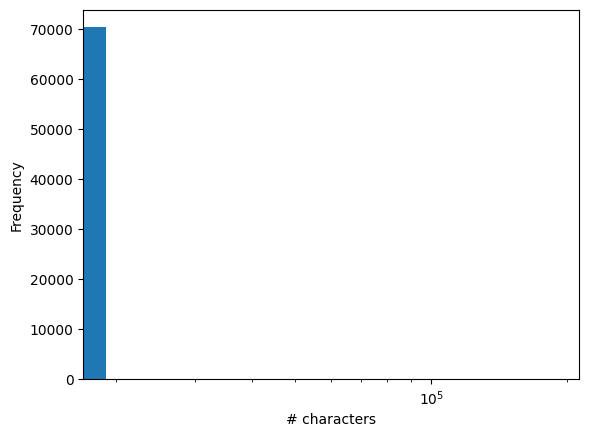

In [78]:
import matplotlib.pyplot as plt
plt.hist(res.sumChars.to_numpy())
plt.xlabel("# characters")
plt.ylabel("Frequency")
plt.xscale("log")

In [79]:
!curl https://2.bp.blogspot.com/-eGskF3n8_Ag/XE7F3P_de2I/AAAAAAAAHU8/WJw0un2nHqMGA8cFVtv_yFfpBVQJSYyVACK4BGAYYCw/s1600/Icon-Reddit.png > reddit.png
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

mask = np.array(Image.open("reddit.png"))
text = " ".join([i for i in kdf.selftext.to_numpy() if len(i) > 0 and i != "[removed]" and i!="[deleted]"])

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 76154  100 76154    0     0   161k      0 --:--:-- --:--:-- --:--:--  162k


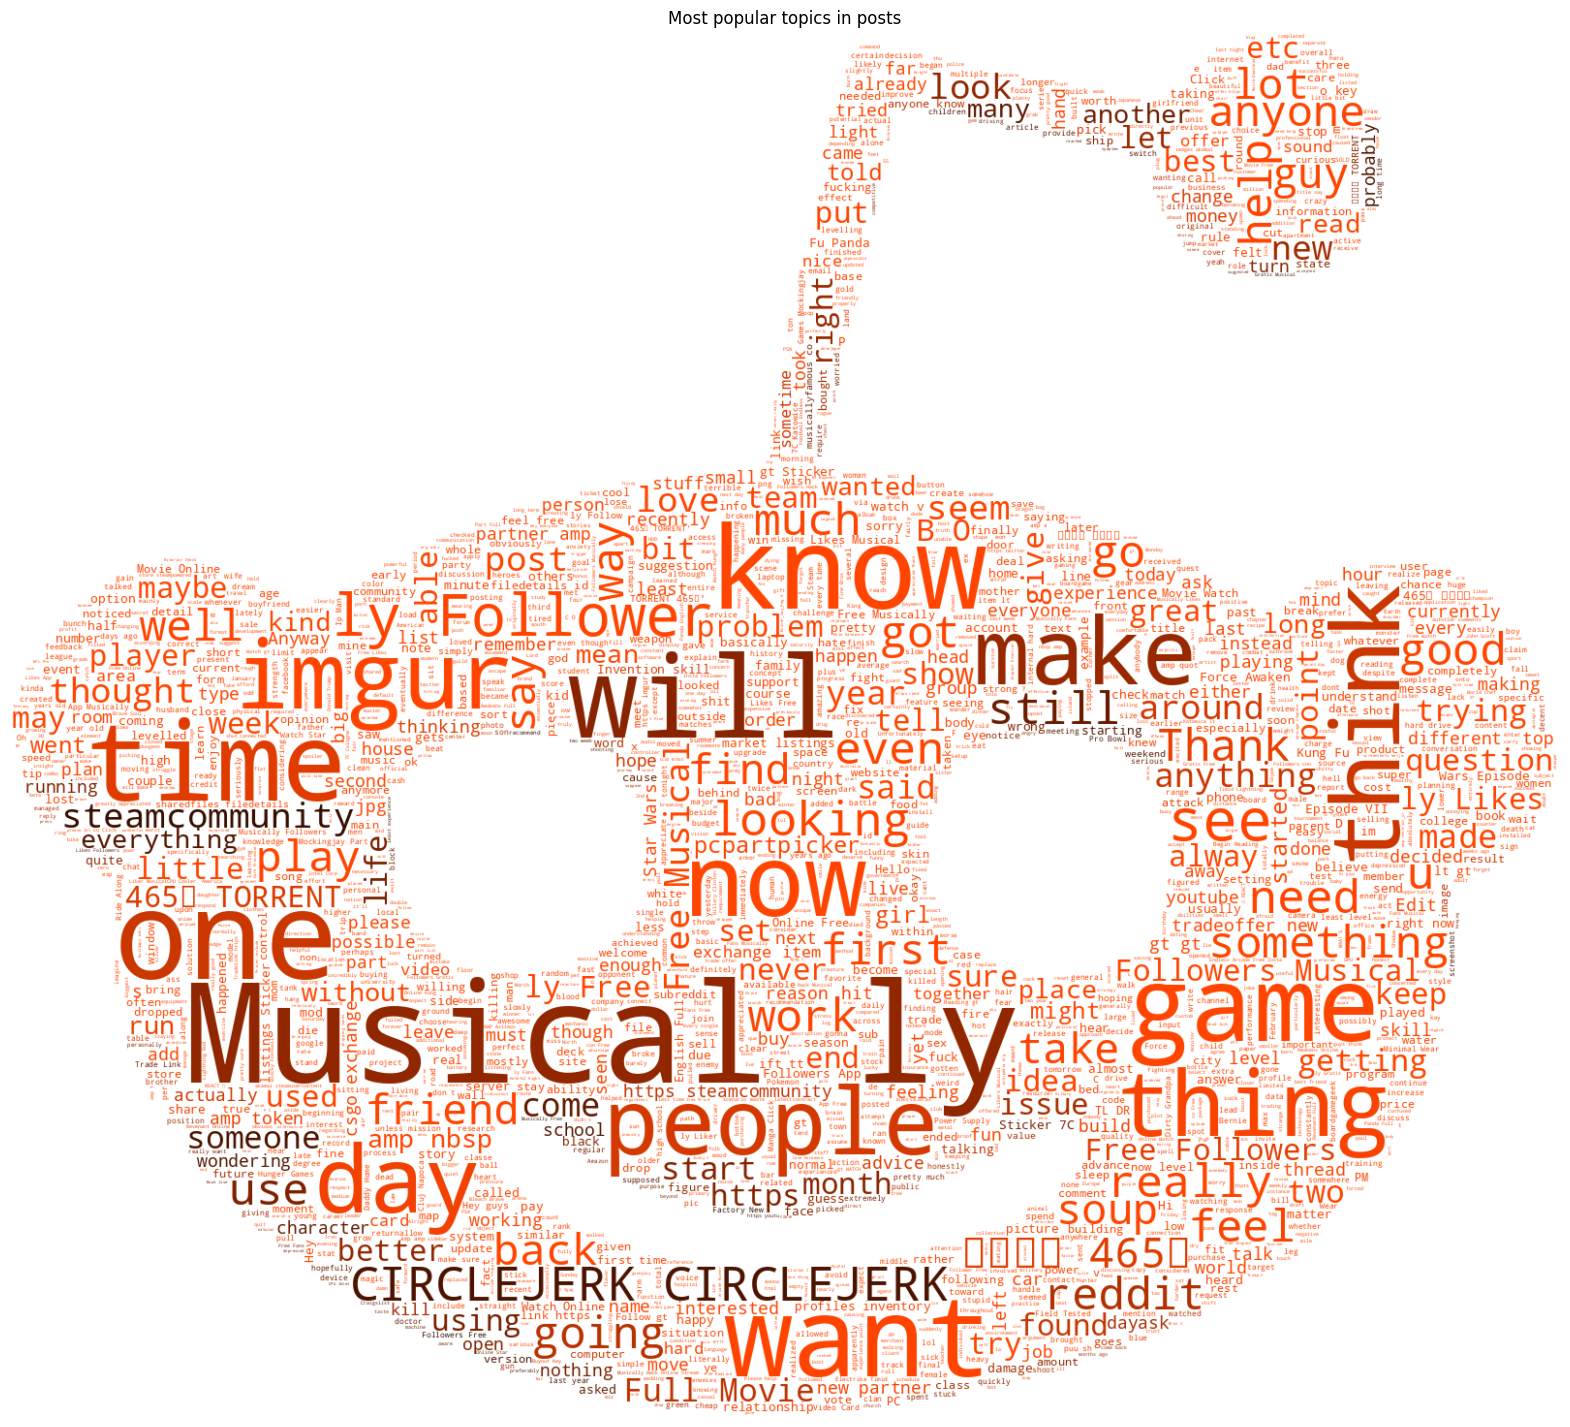

In [80]:
text = " ".join([i for i in kdf.selftext.to_numpy() if len(i) > 0 and i != "[removed]" and i!="[deleted]"])
wordcloud = WordCloud(max_words=5000, mask=~mask[:,:,0], background_color="white", mode="RGBA").generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.title("Most popular topics in posts")
plt.axis("off");

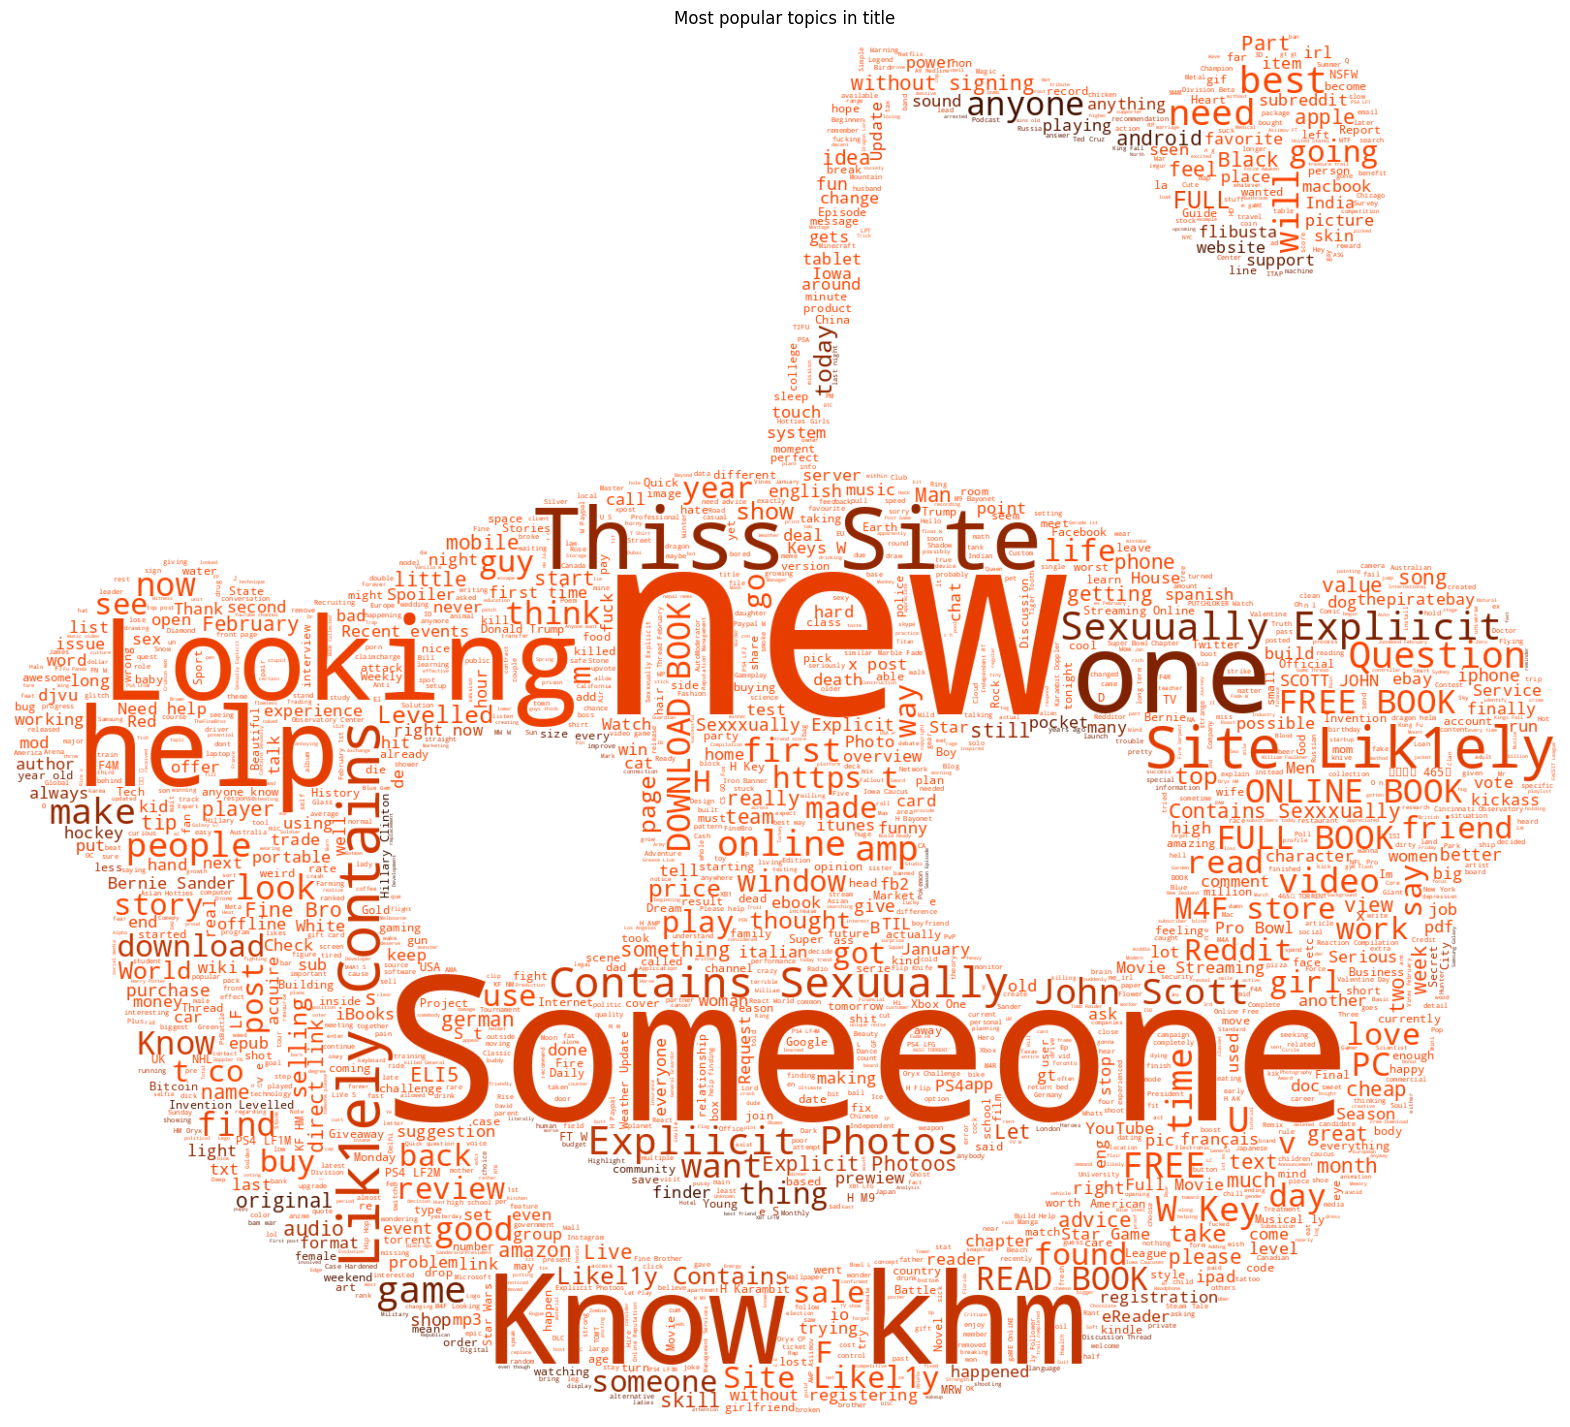

In [81]:
text = " ".join([i for i in kdf.title.to_numpy() if len(i) > 0 and i != "[removed]" and i!="[deleted]"])
wordcloud = WordCloud(max_words=5000, mask=~mask[:,:,0], background_color="white", mode="RGBA").generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.title("Most popular topics in title")
plt.axis("off");

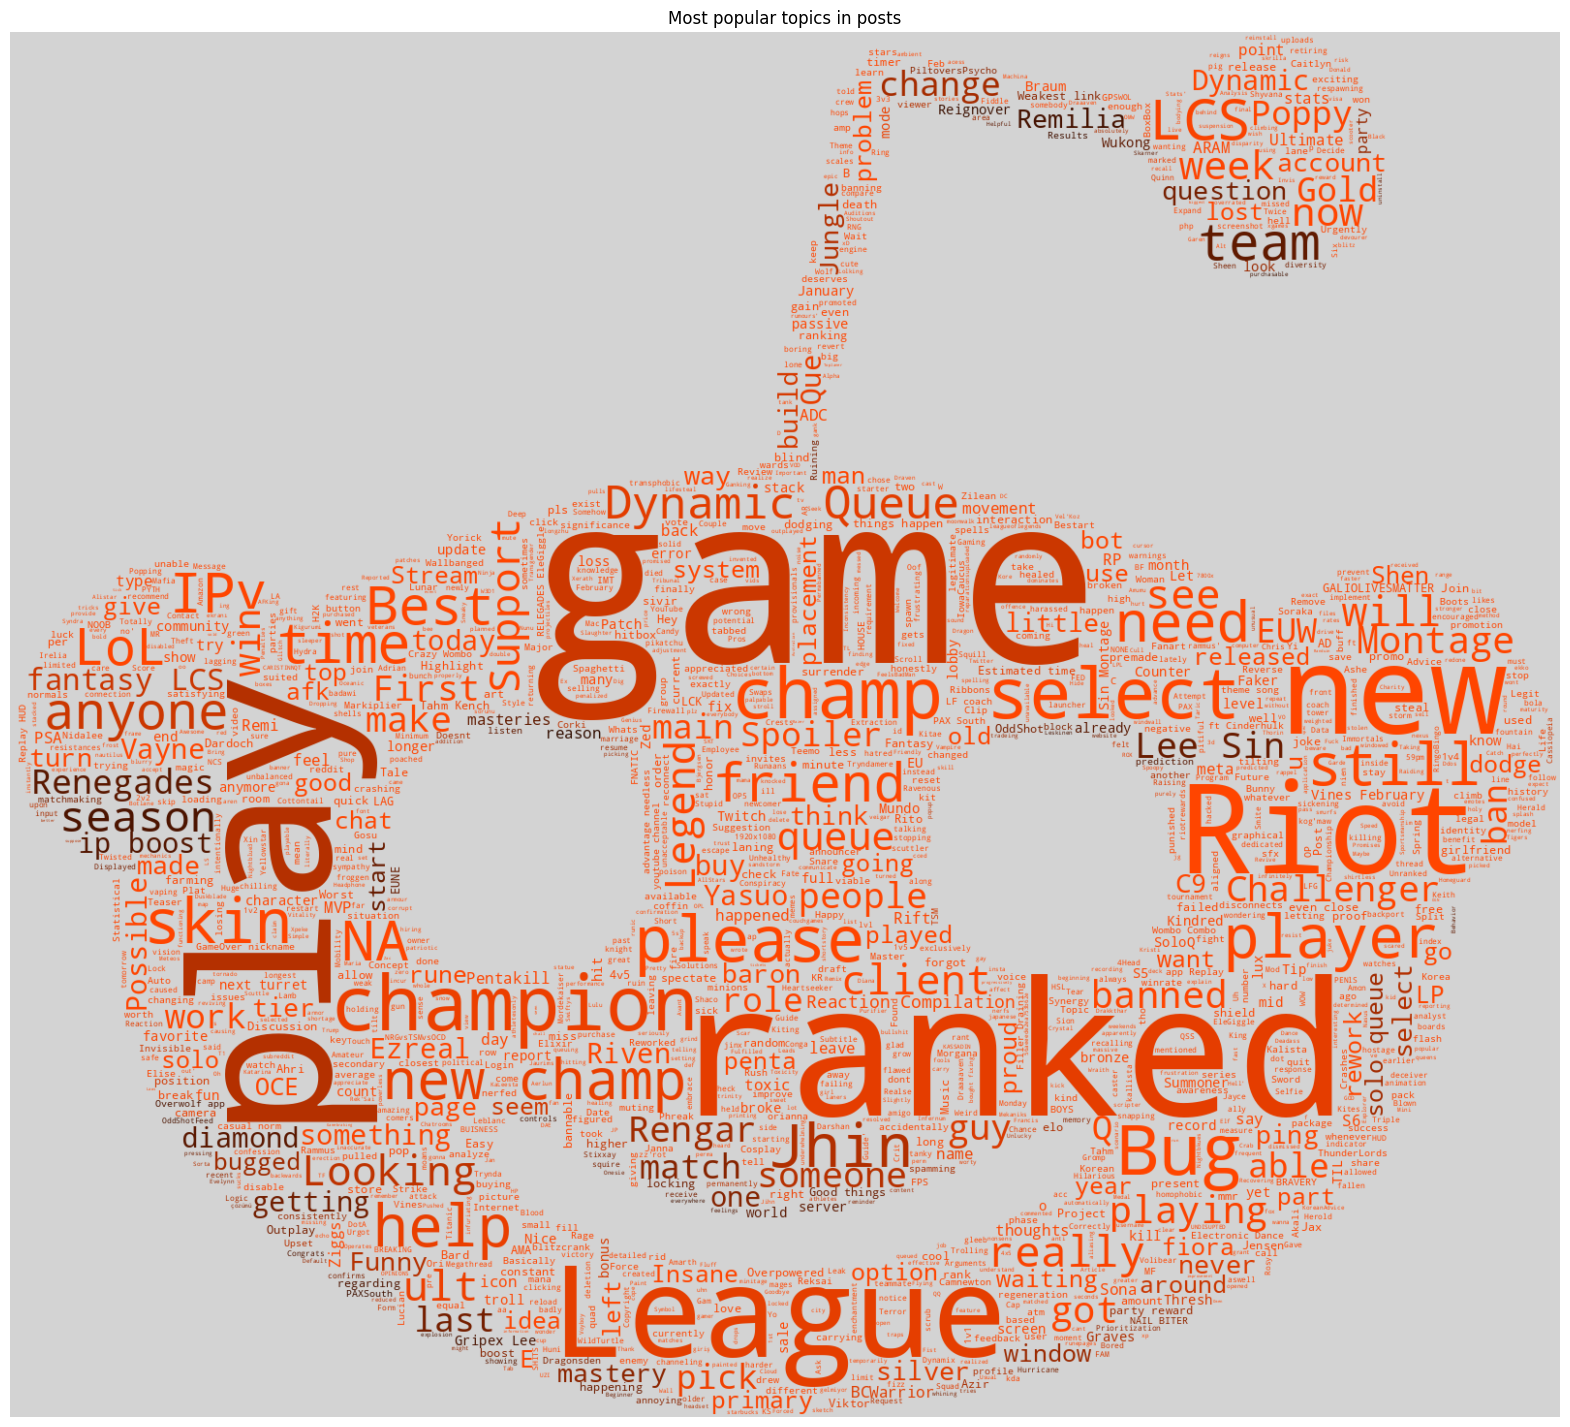

In [82]:

data = kdf[kdf['subreddit'] == 'leagueoflegends']

text = " ".join([i for i in data["title"].to_numpy() if len(i) > 0 and i != "[removed]" and i!="[deleted]"])
wordcloud = WordCloud(max_words=5000, mask=~mask[:,:,0], background_color="lightgray", mode="RGBA").generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.title("Most popular topics in posts")
plt.axis("off");

--------


<font size=10 color=red>Assignment question</font>

Choose a subreddit you like and build a worldcloud using Koalas. Feel free to change the mask or the colors...

--------
Answer:

Como podemos observar en la casilla de encima, hemos filtrado los resultados a coger solamente el texto contenido dentro de los titulos del subreddit "leagueoflegends", pero cambiando esa variable funcionaria con cualquiera, y los resultados nos quedan tal y como vemos en la imagen superior. A demas hemos probado a cambiar el color para verlo algo distinto, lo cual tambien ha funcionado correctamente.